## matplotlib

In [77]:
import pandas as pd
import matplotlib.pyplot as plt 

sales = pd.read_csv('data/raw_sales.csv', parse_dates=['datesold'])
sales.head(3)

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3


In [78]:
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datesold      29580 non-null  datetime64[ns]
 1   postcode      29580 non-null  int64         
 2   price         29580 non-null  int64         
 3   propertyType  29580 non-null  object        
 4   bedrooms      29580 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB
None


In [79]:
import numpy as np 

sales['year'] = sales['datesold'].dt.year
result = np.round(sales.groupby('year')['price'].agg(np.mean), 1)
pd.DataFrame(result.head()).T

year,2007,2008,2009,2010,2011
price,522377.2,493814.2,496092.0,559564.8,566715.1


## 선 그래프

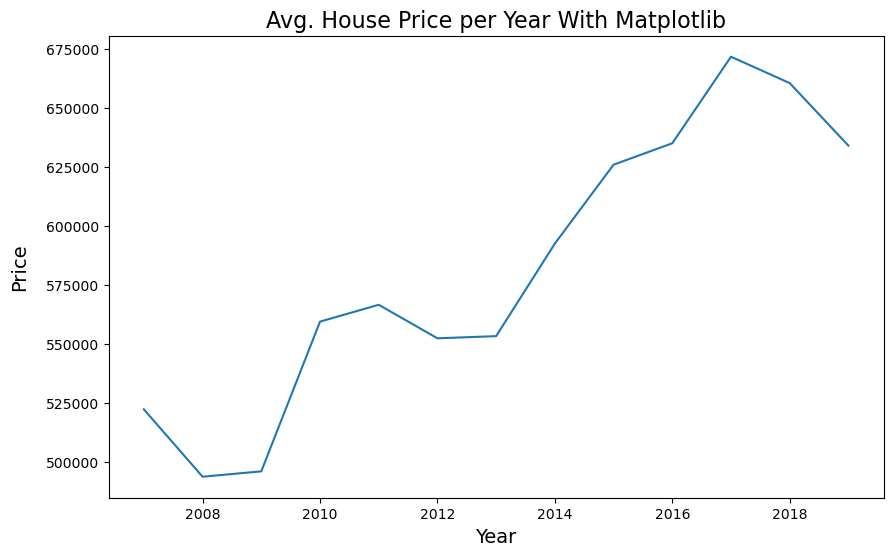

In [80]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(result.index, result.values)
ax.set_title('Avg. House Price per Year With Matplotlib', size = 16)
ax.set_xlabel('Year', size = 14)
ax.set_ylabel('Price', size = 14, labelpad=12)
plt.savefig('output/matplotlib01.png', dpi=200)
plt.show()

## 막대 그래프

In [81]:
import numpy as np 
import seaborn as sns

sales['year'] = sales['datesold'].dt.year
sales['month'] = sales['datesold'].dt.month

# 2007, 2008 추출
df = sales.copy()
df = df[df['year'].isin([2007, 2008])]
result = np.round(df.groupby(['year', 'month'])['price'].agg(np.mean), 1)
result.reset_index().iloc[::3, :]

,year,month,price
0,2007,2,407500.0
3,2007,5,339500.0
6,2007,8,505608.7
9,2007,11,505442.3
12,2008,2,531080.0
15,2008,5,522394.7
18,2008,8,449510.4
21,2008,11,489546.3


In [82]:
result = result.reset_index()
result['year'].unique()

array([2007, 2008], dtype=int64)

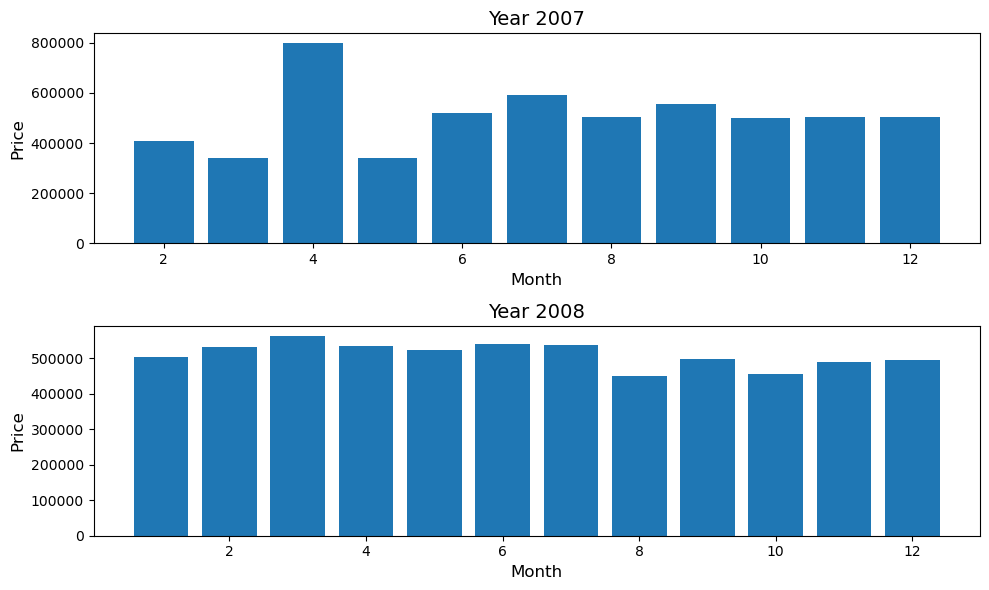

In [83]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
for i, y in enumerate(result['year'].unique()):
    year_data = result[result['year'] == y]
    ax[i].bar(year_data['month'], year_data['price'])
    ax[i].set_title('Year {}'.format(y), fontsize=14)
    ax[i].set_xlabel('Month', fontsize=12)
    ax[i].set_ylabel('Price', fontsize=12)
plt.tight_layout()
plt.savefig('output/matplotlib02.png', dpi=200)
plt.show()

## 박스플롯

In [105]:
sales = pd.read_csv('data/raw_sales.csv', parse_dates=['datesold'])
sales['year'] = sales['datesold'].dt.year
sales['month'] = sales['datesold'].dt.month
sales = sales.loc[sales['price'] < 1000000].reset_index(drop=True)

sales.head(3)

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3


In [106]:
sales['propertyType'].unique()

array(['house', 'unit'], dtype=object)

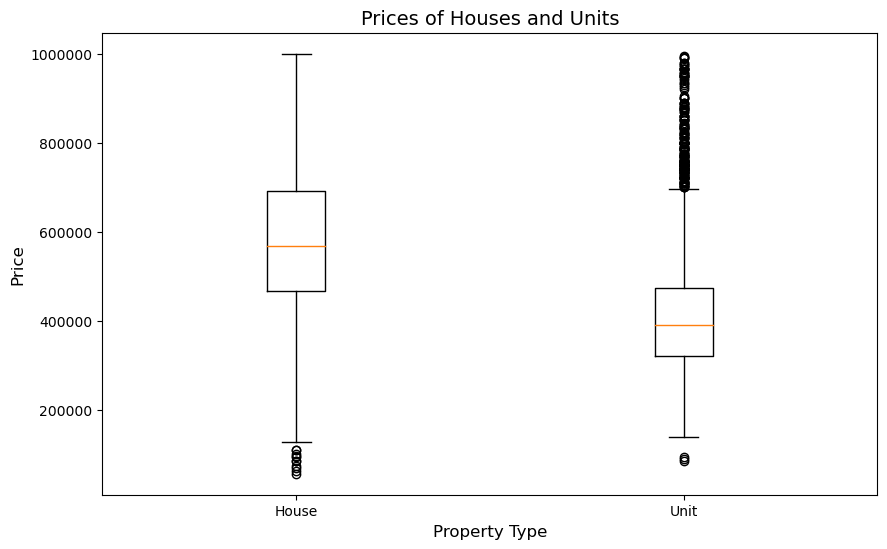

In [107]:
from matplotlib.ticker import ScalarFormatter
formatter = ScalarFormatter()
formatter.set_scientific(False)

house_df = sales[sales['propertyType'] == 'house']['price']
unit_df = sales[sales['propertyType'] == 'unit']['price']

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot([house_df, unit_df])
ax.set_xticklabels(['House', 'Unit'])
ax.set_xlabel('Property Type', fontsize=12)
ax.set_ylabel('Price', fontsize=12)
ax.set_title('Prices of Houses and Units', fontsize=14)
ax.yaxis.set_major_formatter(formatter)

plt.savefig('output/matplotlib03.png', dpi=200)
plt.show()